In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import random
from tqdm import tqdm

import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data

In [2]:
(x_train, y_train), (x_test, y_test) = load_data() 

In [3]:
height, width = 128, 128  

[]
[(3, 47, 12, 28, 28), (7, 80, 55, 28, 28)]


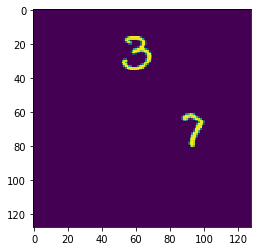

In [11]:
def make_img(x_array, y_array, height, width):
  new_img = np.zeros([height, width])
  mask = np.zeros([height, width])
  old_height = x_array.shape[1]
  old_width = x_array.shape[2]
  all_num = 2
  num = 0
  labels = []
  shifts = []
  while num < all_num:
    x_shift = random.randint(0, width-old_width)
    y_shift = random.randint(0, width-old_height)
    idx = random.randint(0, x_array.shape[0]-1)
    if (mask[y_shift: y_shift+old_height, x_shift: x_shift+old_height]==0).all():
      new_img[y_shift: y_shift+old_height, x_shift: x_shift+old_height] = x_array[idx]
      mask[y_shift: y_shift+old_height, x_shift: x_shift+old_height] = 1
#       labels.append(y_array[idx])
      shifts.append((y_array[idx], x_shift, y_shift, 28, 28))
      num +=1
  return new_img, labels, shifts

s = make_img(x_train, y_train, height, width)
plt.imshow(s[0])
print(s[1])
print(s[2])
#plt.gca().add_patch(matplotlib.patches.Rectangle((s[2][0]),28,28, ec='r', fc='none'))

In [13]:
imgs = []
labels = []
for i in tqdm(range(40000)):
    sample = make_img(x_train, y_train, height, width)
    imgs.append(sample[0])
    labels.append(sample[2])

100%|██████████████████████████████████████████████████████████████████████████| 40000/40000 [00:13<00:00, 2935.29it/s]


In [14]:
labels[0]

[(3, 22, 31, 28, 28), (9, 81, 46, 28, 28)]

In [7]:
#height, width = 128, 128
big_padding = 4
stride = 10
size = 28
padding = 4
#chcemy powiększyć okno o padding i odjąć rozmiar okna
n_rows = (height-size-(2*padding))/stride
n_cols = (width-size-(2*padding))/stride
print(((size+2*padding)+stride*10))

136


In [15]:
from math import sqrt

In [19]:
row, column = (0, 0)
h = size/2+padding+stride*row
w = size/2+padding+stride*column
def kardashian_dist(labels, h, w):
    # 1. get coords
    # 2. count distance
    # 3. return smallest distance
    distances = []
    # example labels:
    # [(3, 22, 31, 28, 28), (9, 81, 46, 28, 28)]
    for i, label in enumerate(labels):
        x = label[1]
        y = label[2]
        # a^2 + b^2 = c^2
        # c = sqrt(a^2 + b^2)
        distance = sqrt((h - y)**2 + (w - x)**2)
        distances.append((i, distance))
    return distances

In [20]:
kardashian_dist(labels[0], h, w)

[(0, 13.601470508735444), (1, 68.94200461257273)]

In [22]:
sqrt(18**2 + 18**2)
# ustawiamy na 20 pixeli

25.45584412271571

[(3, 22, 31, 28, 28), (9, 81, 46, 28, 28)]

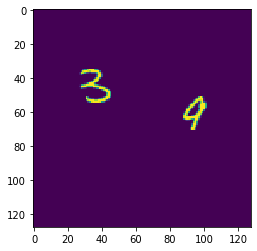

In [21]:
plt.imshow(imgs[0])
labels[0]

In [ ]:
# clfs, confidence, reg

def step(X, y):
    for row in range(n_rows):
        for column in range(n_cols):
            h = size/2+padding+stride*row
            w = size/2+padding+stride*column
            kardashian_dist(y, h, w)
            with tf.GradientTape() as tape:
                pred = model(X)[0]
                loss = cat_loss(y, pred)
                if 

                grads = tape.gradient(loss, model.trainable_variables)
                opt.apply_gradients(zip(grads, model.trainable_variables))

# kiedy jest cyfra
    cyfry powinny być posortowane
    jeśli współrzędne są w kwadracie dodaj właściwy label
    predykcja confidence
    strata dla regresji powinna być mała
    klasyfikacja


# kiedy nie ma cyfry
    współrzędne nie są w kwadracie dodaj random label
    predykcja confidence
    nie liczymy straty regresji i klasyfikacji

In [ ]:
imgs = np.array(imgs)
labels = np.array(labels)

In [ ]:
imgs = imgs/255

In [ ]:
labels = labels.reshape(40000, -1)

In [ ]:
imgs = imgs.reshape(40000,96,96,1)

In [ ]:
labels.shape

(40000, 8)

In [27]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten

inp = Input([36,36,1])
x = inp
x = Conv2D(16, 3, padding='same', activation='relu')(x)
x = MaxPooling2D()(x)
x = Conv2D(32, 3, padding='same', activation='relu')(x)
x = MaxPooling2D()(x)
x = Conv2D(64, 3, padding='same', activation='relu')(x)
x = MaxPooling2D()(x)
x = Conv2D(128, 3, padding='same', activation='relu')(x)
# x = Dropout(0.4)(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)
clfs = Dense(10, activation="softmax")(x)
confidence = Dense(2, activation="softmax")(x)
reg = Dense(4, activation="softmax")(x)

model = Model(inputs=inp, outputs=[clfs, confidence, reg])

In [24]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [25]:
model.compile(optimizer='adam', loss=[SparseCategoricalCrossentropy(from_logits=True),
                                      "binary_crossentropy",
                                      'mse'])

In [26]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 36, 36, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 36, 36, 16)   160         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 18, 18, 16)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 18, 18, 32)   4640        max_pooling2d[0][0]              
______________________________________________________________________________________________

In [ ]:
#model.fit(imgs, labels, epochs=5, batch_size=64)

In [ ]:
model.predict(imgs[1].reshape(1,96,96,1))

array([[-0.01725834,  0.00448811,  0.01047117, -0.03446294, -0.0052368 ,
         0.01385983, -0.02138148, -0.01389986]], dtype=float32)

In [ ]:
labels[1]

array([47,  8, 28, 28, 12, 18, 28, 28])